# Diagnostic du diabete

The Pima are a group of Native Americans living in Arizona. A genetic predisposition allowed this group to survive normally to a diet poor of carbohydrates for years. In the recent years, because of a sudden shift from traditional agricultural crops to processed foods, together with a decline in physical activity, made them develop the highest prevalence of type 2 diabetes and for this reason they have been subject of many studies.

# Dataset
The dataset includes data from 768 women with 8 characteristics, in particular:

- Pregnancies: No. of times pregnant
- Glucose: Plasma Glucose Concentration a 2 hour in an oral glucose tolerance test (mg/dl) A 2-hour value between 140 and 200 mg/dL (7.8 and 11.1 mmol/L) is called impaired glucose tolerance. This is called "pre- diabetes." It means you are at increased risk of developing diabetes over time. A glucose level of 200 mg/dL (11.1 mmol/L) or higher is used to diagnose diabetes.
- Blood Pressure: Diastolic Blood Pressure(mmHg): If Diastolic B.P > 90 means High B.P (High Probability of Diabetes) Diastolic B.P < 60 means low B.P (Less Probability of Diabetes)
Skin Thickness: Triceps Skin Fold Thickness (mm) – A value used to estimate body fat. Normal Triceps SkinFold Thickness in women is 23mm. Higher thickness leads to obesity and chances of diabetes increases.
- Insulin: 2-Hour Serum Insulin (mu U/ml) Normal Insulin Level 16-166 mIU/L Values above this range can be alarming.
BMI: Body Mass Index (weight in kg/ height in m2) Body Mass Index of 18.5 to 25 is within the normal range BMI between 25 and 30 then it falls within the overweight range. A BMI of 30 or over falls within the obese range.
- Diabetes Pedigree Function: It provides information about diabetes history in relatives and genetic relationship of those relatives with patients. Higher Pedigree Function means patient is more likely to have diabetes.
- Age (years)
- Outcome: Class Variable (0 or 1) where ‘0’ denotes patient is not having diabetes and ‘1’ denotes patient having diabetes The dependent variable is whether the patient is having diabetes or not.

In [6]:
# Directive pour afficher les graphiques dans Jupyter
%matplotlib inline

In [7]:
# Pandas : librairie de manipulation de données
# NumPy : librairie de calcul scientifique
# MatPlotLib : librairie de visualisation et graphiques
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score,auc, accuracy_score

from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split

In [8]:
df = pd.read_csv("diabete.csv")

In [9]:
df.head(20)

n_pregnant  glucose  tension  thickness  insulin   bmi  pedigree  age  \
0            6      148       72         35        0  33.6     0.627   50   
1            1       85       66         29        0  26.6     0.351   31   
2            8      183       64          0        0  23.3     0.672   32   
3            1       89       66         23       94  28.1     0.167   21   
4            0      137       40         35      168  43.1     2.288   33   
5            5      116       74          0        0  25.6     0.201   30   
6            3       78       50         32       88  31.0     0.248   26   
7           10      115        0          0        0  35.3     0.134   29   
8            2      197       70         45      543  30.5     0.158   53   
9            8      125       96          0        0   0.0     0.232   54   
10           4      110       92          0        0  37.6     0.191   30   
11          10      168       74          0        0  38.0     0.537   34   
12          10      139       80          0        0  27.1     1.441   57   
13           1      189       60         23      846  30.1     0.398   59   
14           5      166       72         19      175  25.8     0.587   51   
15           7      100        0          0        0  30.0     0.484   32   
16           0      118       84         47      230  45.8     0.551   31   
17           7      107       74          0        0  29.6     0.254   31   
18           1      103       30         38       83  43.3     0.183   33   
19           1      115       70         30       96  34.6     0.529   32   

    diabete  
0         1  
1         0  
2         1  
3         0  
4         1  
5         0  
6         1  
7         0  
8         1  
9         1  
10        0  
11        1  
12        0  
13        1  
14        1  
15        1  
16        1  
17        1  
18        0  
19        1

In [10]:
df.diabete.value_counts()

0    500
1    268
Name: diabete, dtype: int64

In [11]:
df1 = df.replace(0,np.nan)

In [12]:
df1.n_pregnant=df.n_pregnant

In [13]:
df1.diabete=df.diabete

In [14]:
df1.count()

n_pregnant    768
glucose       763
tension       733
thickness     541
insulin       394
bmi           757
pedigree      768
age           768
diabete       768
dtype: int64

In [15]:
values={'glucose':df1.glucose.mean(), 'tension':df1.tension.mean(), 'thickness':df1.thickness.mean(), 'insulin':df1.insulin.mean(), 'bmi':df1.bmi.mean()}

In [16]:
df1=df1.fillna(value=values)

In [17]:
df1.head()

n_pregnant  glucose  tension  thickness     insulin   bmi  pedigree  age  \
0           6    148.0     72.0   35.00000  155.548223  33.6     0.627   50   
1           1     85.0     66.0   29.00000  155.548223  26.6     0.351   31   
2           8    183.0     64.0   29.15342  155.548223  23.3     0.672   32   
3           1     89.0     66.0   23.00000   94.000000  28.1     0.167   21   
4           0    137.0     40.0   35.00000  168.000000  43.1     2.288   33   

   diabete  
0        1  
1        0  
2        1  
3        0  
4        1

In [18]:
df1.describe()

n_pregnant     glucose     tension   thickness     insulin         bmi  \
count  768.000000  768.000000  768.000000  768.000000  768.000000  768.000000   
mean     3.845052  121.686763   72.405184   29.153420  155.548223   32.457464   
std      3.369578   30.435949   12.096346    8.790942   85.021108    6.875151   
min      0.000000   44.000000   24.000000    7.000000   14.000000   18.200000   
25%      1.000000   99.750000   64.000000   25.000000  121.500000   27.500000   
50%      3.000000  117.000000   72.202592   29.153420  155.548223   32.400000   
75%      6.000000  140.250000   80.000000   32.000000  155.548223   36.600000   
max     17.000000  199.000000  122.000000   99.000000  846.000000   67.100000   

         pedigree         age     diabete  
count  768.000000  768.000000  768.000000  
mean     0.471876   33.240885    0.348958  
std      0.331329   11.760232    0.476951  
min      0.078000   21.000000    0.000000  
25%      0.243750   24.000000    0.000000  
50%      0.372500   29.000000    0.000000  
75%      0.626250   41.000000    1.000000  
max      2.420000   81.000000    1.000000

In [19]:
scaler = preprocessing.StandardScaler()
df1[['glucose', 'tension','thickness','insulin','bmi','pedigree']] = scaler.fit_transform(df1[['glucose', 'tension','thickness','insulin','bmi','pedigree']])

In [20]:
df1.describe()

n_pregnant       glucose       tension     thickness       insulin  \
count  768.000000  7.680000e+02  7.680000e+02  7.680000e+02  7.680000e+02   
mean     3.845052 -3.561966e-16  6.915764e-16  7.956598e-16 -3.330669e-16   
std      3.369578  1.000652e+00  1.000652e+00  1.000652e+00  1.000652e+00   
min      0.000000 -2.554131e+00 -4.004245e+00 -2.521670e+00 -1.665945e+00   
25%      1.000000 -7.212214e-01 -6.953060e-01 -4.727737e-01 -4.007289e-01   
50%      3.000000 -1.540881e-01 -1.675912e-02  8.087936e-16 -3.345079e-16   
75%      6.000000  6.103090e-01  6.282695e-01  3.240194e-01 -3.345079e-16   
max     17.000000  2.541850e+00  4.102655e+00  7.950467e+00  8.126238e+00   

                bmi      pedigree         age     diabete  
count  7.680000e+02  7.680000e+02  768.000000  768.000000  
mean   3.515706e-16  2.451743e-16   33.240885    0.348958  
std    1.000652e+00  1.000652e+00   11.760232    0.476951  
min   -2.075119e+00 -1.189553e+00   21.000000    0.000000  
25%   -7.215397e-01 -6.889685e-01   24.000000    0.000000  
50%   -8.363615e-03 -3.001282e-01   29.000000    0.000000  
75%    6.029301e-01  4.662269e-01   41.000000    1.000000  
max    5.042087e+00  5.883565e+00   81.000000    1.000000

In [21]:
scaler = preprocessing.MinMaxScaler()
df1[['glucose', 'tension','thickness','insulin','bmi','pedigree']] = scaler.fit_transform(df1[['glucose', 'tension','thickness','insulin','bmi','pedigree']])

In [22]:
df1.describe()

n_pregnant     glucose     tension   thickness     insulin         bmi  \
count  768.000000  768.000000  768.000000  768.000000  768.000000  768.000000   
mean     3.845052    0.501205    0.493930    0.240798    0.170130    0.291564   
std      3.369578    0.196361    0.123432    0.095554    0.102189    0.140596   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      1.000000    0.359677    0.408163    0.195652    0.129207    0.190184   
50%      3.000000    0.470968    0.491863    0.240798    0.170130    0.290389   
75%      6.000000    0.620968    0.571429    0.271739    0.170130    0.376278   
max     17.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

         pedigree         age     diabete  
count  768.000000  768.000000  768.000000  
mean     0.168179   33.240885    0.348958  
std      0.141473   11.760232    0.476951  
min      0.000000   21.000000    0.000000  
25%      0.070773   24.000000    0.000000  
50%      0.125747   29.000000    0.000000  
75%      0.234095   41.000000    1.000000  
max      1.000000   81.000000    1.000000

In [23]:
X = df1.drop(['diabete'], axis=1)
y = df1.diabete
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

## Régression logistique

In [24]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_lr = lr.predict(X_test)

c:\users\user\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [25]:
lr_score = metrics.accuracy_score(y_test, y_lr)
print(lr_score)

0.7727272727272727


In [26]:
print(metrics.classification_report(y_test, y_lr))

              precision    recall  f1-score   support

           0       0.78      0.90      0.84        99
           1       0.75      0.55      0.63        55

   micro avg       0.77      0.77      0.77       154
   macro avg       0.77      0.72      0.73       154
weighted avg       0.77      0.77      0.76       154



In [27]:
cm = metrics.confusion_matrix(y_test, y_lr)
print(cm)

[[89 10]
 [25 30]]


In [28]:
probas = lr.predict_proba(X_test)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,probas[:, 1])
roc_auc = auc(false_positive_rate, true_positive_rate)
print (roc_auc)

0.8650137741046832


Text(0.5,0,'False Positive Rate')

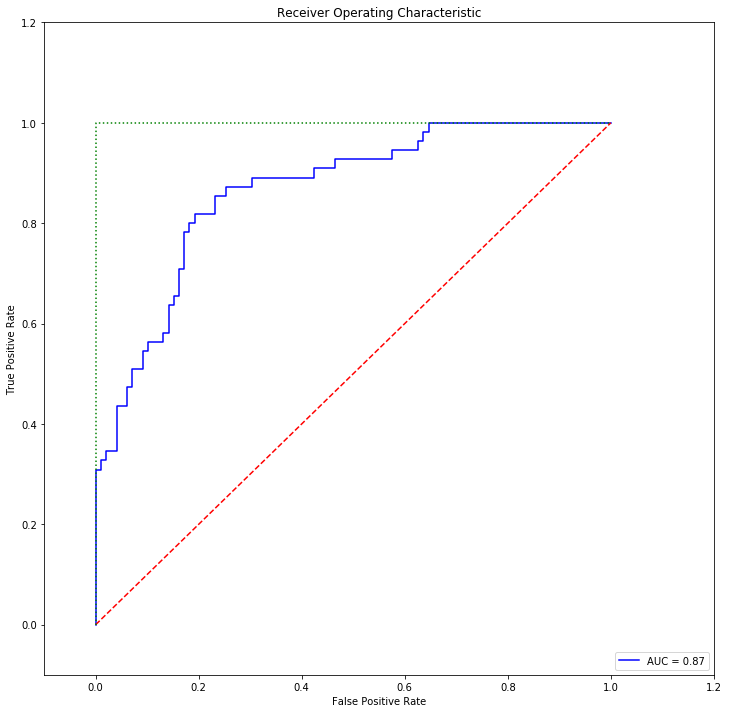

In [29]:
plt.figure(figsize=(12,12))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b', label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')        # plus mauvaise courbe
plt.plot([0,0,1],[0,1,1],'g:')     # meilleure courbe
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

## Sous échantillonnage

Pour installer le package Imbalanced learn :
- lancer "Anaconda prompt" (du package Anaconda)
- exécuter "conda install -c conda-forge imbalanced-learn"

In [30]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler()

X_rus, y_rus = rus.fit_sample(X_train, y_train)

In [31]:
print(X_rus.shape)
print(y_rus.shape)

(426, 8)
(426,)


In [32]:
lr = LogisticRegression()
lr.fit(X_rus,y_rus)
y_lr = lr.predict(X_test)

c:\users\user\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [33]:
print(metrics.classification_report(y_test, y_lr))

              precision    recall  f1-score   support

           0       0.86      0.83      0.85        99
           1       0.71      0.76      0.74        55

   micro avg       0.81      0.81      0.81       154
   macro avg       0.79      0.80      0.79       154
weighted avg       0.81      0.81      0.81       154



In [36]:
cm = metrics.confusion_matrix(y_test, y_lr)#82 nbre de prediction vrai, 21 nbre predi faut
                                           #42 nombre prédi vrai, 13 nbre prédi faut
print(cm)

[[82 17]
 [13 42]]


In [37]:
probas = lr.predict_proba(X_test)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,probas[:, 1])
roc_auc = auc(false_positive_rate, true_positive_rate)
print (roc_auc)

0.8640955004591369


Text(0.5,0,'False Positive Rate')

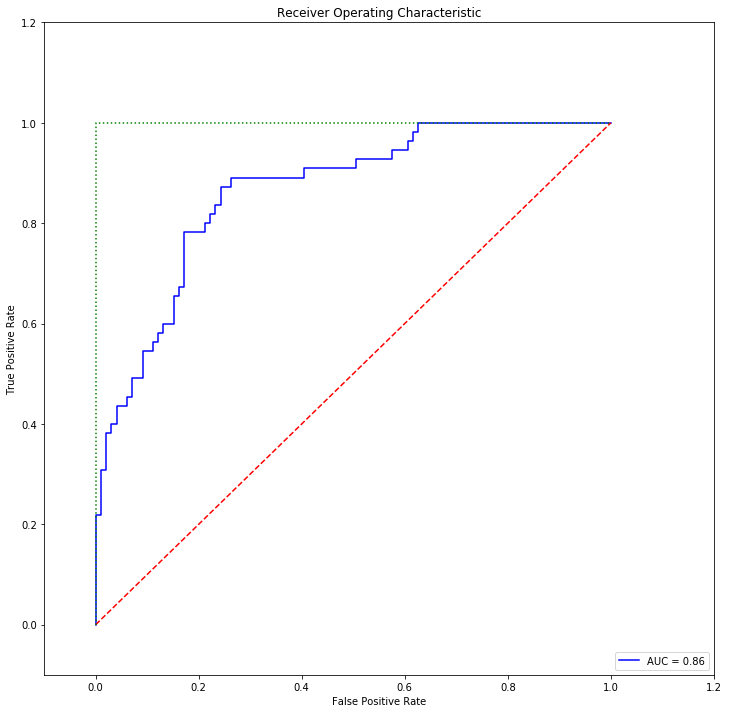

In [38]:
plt.figure(figsize=(12,12))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b', label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')        # plus mauvaise courbe
plt.plot([0,0,1],[0,1,1],'g:')     # meilleure courbe
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [39]:
print(metrics.classification_report(y_test,y_lr))

              precision    recall  f1-score   support

           0       0.86      0.83      0.85        99
           1       0.71      0.76      0.74        55

   micro avg       0.81      0.81      0.81       154
   macro avg       0.79      0.80      0.79       154
weighted avg       0.81      0.81      0.81       154



La méthode Tomek consiste à sélectionner les données à éliminer en privilégiant les instances proches de la classe minoritaire

<img src="https://raw.githubusercontent.com/rafjaa/machine_learning_fecib/master/src/static/img/tomek.png?v=2">

In [41]:
from imblearn.under_sampling import TomekLinks

tl = TomekLinks(return_indices=True, ratio='majority')#=fitsimple: esemble de test
X_tl, y_tl, i_tl = tl.fit_sample(X_train, y_train)

In [42]:
lr = LogisticRegression()
lr.fit(X_tl,y_tl)# j'effectur maintemant mon apprentissage sur x_tl et y_tl
y_lr = lr.predict(X_test)

c:\users\user\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [43]:
probas = lr.predict_proba(X_test)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,probas[:, 1])
roc_auc = auc(false_positive_rate, true_positive_rate)
print (roc_auc)

0.8609733700642791


In [44]:
print(metrics.classification_report(y_test,y_lr))

              precision    recall  f1-score   support

           0       0.79      0.86      0.83        99
           1       0.70      0.60      0.65        55

   micro avg       0.77      0.77      0.77       154
   macro avg       0.75      0.73      0.74       154
weighted avg       0.76      0.77      0.76       154



## Suréchantillonnage

La méthode SMOTE (Synthetic Minority Oversampling TEchnique) consiste à synthétiser des éléments pour la classe minoritaire, à partir de ceux qui existent déjà. Elle fonctionne en choisissant au hasard un point de la classe minoritaire et en calculant les k-voisins les plus proches pour ce point. Les points synthétiques sont ajoutés entre le point choisi et ses voisins.

<img src="https://raw.githubusercontent.com/rafjaa/machine_learning_fecib/master/src/static/img/smote.png">

In [45]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(ratio='minority')# trouve la classe minoritaire 
X_sm, y_sm = smote.fit_sample(X_train, y_train)#et génère de faut points pour complété le plus petit ensemble

In [46]:
lr = LogisticRegression()
lr.fit(X_sm,y_sm)
y_lr = lr.predict(X_test)

c:\users\user\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [41]:
probas = lr.predict_proba(X_test)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,probas[:, 1])
roc_auc = auc(false_positive_rate, true_positive_rate)
print (roc_auc)

0.8683195592286501


In [42]:
print(metrics.classification_report(y_test,y_lr))

             precision    recall  f1-score   support

          0       0.87      0.82      0.84        99
          1       0.70      0.78      0.74        55

avg / total       0.81      0.81      0.81       154



On peut aussi combiner un suréchantillonnage SMOTE et un sous-échantillonnage Tomek

In [43]:
from imblearn.combine import SMOTETomek

smt = SMOTETomek(ratio='auto')
X_smt, y_smt = smt.fit_sample(X_train, y_train)

In [44]:
lr = LogisticRegression()
lr.fit(X_smt,y_smt)
y_lr = lr.predict(X_test)

In [45]:
probas = lr.predict_proba(X_test)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,probas[:, 1])
roc_auc = auc(false_positive_rate, true_positive_rate)
print (roc_auc)

0.8657483930211203


## Exercice : tester les méthodes d'équilibrage sur la fraude

*The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.*

*It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, ... V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.*

https://www.kaggle.com/samkirkiles/credit-card-fraud/data

Tester d'abord une régression logistique sans équilibrage

Attention : certaines méthodes comme Tomek peuvent prendre du temps sur de gros datasets. En cas de problème, aller dans Kernel/Restart kernel

Tester aussi la méthode *Gradient boosting classifier*

In [39]:
df=pd.read_csv('creditcardsmall.csv')

In [40]:
df.head()

Time        V1        V2        V3        V4        V5        V6  \
0   37761.0  1.170402  0.082892  0.248159  0.549702 -0.340477 -0.334315   
1   61996.0  1.392221 -0.370643 -0.022648 -0.491094 -0.950560 -1.241900   
2   53154.0  0.035377  0.746276  0.764141  1.395622 -0.204619  1.234427   
3  152235.0  2.157414  0.130767 -2.494308  0.093720  0.660493 -1.873582   
4   77106.0  1.467719 -1.000760 -0.393583 -1.627055 -0.757965 -0.476204   

         V7        V8        V9  ...         V21       V22       V23  \
0 -0.259392  0.219753  0.135692  ...   -0.236834 -0.801259  0.175884   
1 -0.510918 -0.196627 -0.668574  ...    0.242669  0.601799 -0.162020   
2 -0.245453 -1.500741  0.163650  ...    1.450811 -0.403029 -0.149407   
3  1.007827 -0.670509  0.210973  ...    0.265044  0.960043 -0.218294   
4 -0.532292 -0.189458 -2.385097  ...   -0.481383 -1.194565 -0.009747   

        V24       V25       V26       V27       V28  Amount  Class  
0 -0.088531  0.032035  0.115039 -0.026057  0.011852    0.89      0  
1  0.332949  0.611511 -0.037983  0.006586  0.032640   19.80      0  
2 -0.729501  1.055061  0.006638  0.292215  0.203767   72.80      0  
3 -0.025903  0.755203  0.469181 -0.106662 -0.092734    6.30      0  
4 -0.582657  0.405868 -0.418823 -0.011604  0.005290   64.23      0  

[5 rows x 31 columns]